In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.metrics import (
    accuracy_score, 
    roc_auc_score, 
    roc_curve, 
    confusion_matrix, 
    classification_report,
    precision_score,
    recall_score,
    f1_score
)

from IPython.display import display, Markdown

### Первые 5 строк датасета:

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


### Информация о датасете:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

None

### Описательные статистики:

,count,mean,std,min,25%,50%,75%,max
client_id,3000.0,1500.500000,866.169729,1.000000,750.750000,1500.500000,2250.250000,3000.000000
age,3000.0,45.059667,14.192883,21.000000,33.000000,45.000000,57.000000,69.000000
income,3000.0,69658.992000,24742.235182,15000.000000,52641.750000,69784.500000,85874.250000,156351.000000
years_employed,3000.0,19.577667,11.381497,0.000000,10.000000,20.000000,29.000000,39.000000
credit_score,3000.0,649.285333,69.955852,402.000000,604.000000,647.000000,697.000000,850.000000
debt_to_income,3000.0,0.284065,0.161112,0.006147,0.157796,0.261726,0.388886,0.878343
num_credit_cards,3000.0,3.494667,2.289917,0.000000,1.000000,3.000000,6.000000,7.000000
num_late_payments,3000.0,6.869333,4.291278,0.000000,3.000000,7.000000,10.000000,14.000000
has_mortgage,3000.0,0.495000,0.500058,0.000000,0.000000,0.000000,1.000000,1.000000
has_car_loan,3000.0,0.501333,0.500082,0.000000,0.000000,1.000000,1.000000,1.000000


### Распределение целевого признака (default):

default
0    0.589667
1    0.410333
Name: proportion, dtype: float64

График сохранен: figures/target_distribution.png


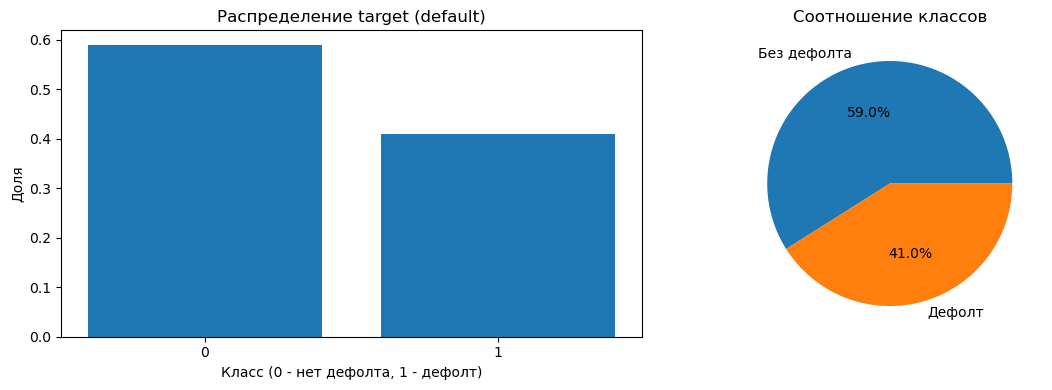

АНАЛИЗ ДАННЫХ:
1. Размер датасета: 3000 строк, 17 столбцов
2. Целевая переменная 'default': 41.0% дефолтов, 59.0% не дефолтов
3. Пропущенных значений: 0
4. Все признаки числовые, что упрощает обработку
5. Признак 'client_id' - технический, будет исключен из модели


In [21]:

df = pd.read_csv('S05-hw-dataset.csv')

display(Markdown("### Первые 5 строк датасета:"))
display(df.head())

display(Markdown("### Информация о датасете:"))
display(df.info())

display(Markdown("### Описательные статистики:"))
display(df.describe().T)

display(Markdown("### Распределение целевого признака (default):"))
target_dist = df['default'].value_counts(normalize=True)
display(target_dist)


fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].bar(target_dist.index.astype(str), target_dist.values)
ax[0].set_title('Распределение target (default)')
ax[0].set_xlabel('Класс (0 - нет дефолта, 1 - дефолт)')
ax[0].set_ylabel('Доля')


target_counts = df['default'].value_counts()
ax[1].pie(target_counts.values, labels=['Без дефолта', 'Дефолт'], autopct='%1.1f%%')
ax[1].set_title('Соотношение классов')
plt.tight_layout()


save_path = os.path.join('figures', 'target_distribution.png')
plt.savefig(save_path, dpi=100, bbox_inches='tight')
print(f"График сохранен: {save_path}")
plt.show()


print("=" * 60)
print("АНАЛИЗ ДАННЫХ:")
print(f"1. Размер датасета: {df.shape[0]} строк, {df.shape[1]} столбцов")
print(f"2. Целевая переменная 'default': {target_dist[1]*100:.1f}% дефолтов, {target_dist[0]*100:.1f}% не дефолтов")
print(f"3. Пропущенных значений: {df.isnull().sum().sum()}")
if df.isnull().sum().sum() > 0:
    print(f"   Столбцы с пропусками: {list(df.columns[df.isnull().any()])}")
print("4. Все признаки числовые, что упрощает обработку")
print("5. Признак 'client_id' - технический, будет исключен из модели")
print("=" * 60)

In [26]:
display(Markdown("###  Проверка диапазонов ключевых признаков"))

# Создаем таблицу для отображения
ranges_data = {
    'Признак': ['age', 'debt_to_income', 'credit_score'],
    'Минимум': [
        df['age'].min(),
        f"{df['debt_to_income'].min():.3f}",
        df['credit_score'].min()
    ],
    'Максимум': [
        df['age'].max(),
        f"{df['debt_to_income'].max():.3f}",
        df['credit_score'].max()
    ],
    'Описание': [
        'Возраст клиента (годы)',
        'Отношение долга к доходу',
        'Кредитный скоринг'
    ]
}

ranges_df = pd.DataFrame(ranges_data)
display(ranges_df.style.hide(axis='index'))

display(Markdown("###  Подготовка признаков и таргета"))

# Выделяем признаки и цель
X = df.drop(['default', 'client_id'], axis=1)
y = df['default']

display(Markdown(f"""
**Матрица признаков X:** `{X.shape[0]} × {X.shape[1]}`  
**Вектор таргета y:** `{len(y)}` значений  
**Исключенные столбцы:** `default` (таргет), `client_id` (технический)
"""))

display(Markdown("**Используемые признаки:**"))
features_list = pd.DataFrame({
    '№': range(1, len(X.columns) + 1),
    'Признак': X.columns
})
display(features_list.style.hide(axis='index'))

###  Проверка диапазонов ключевых признаков

Признак,Минимум,Максимум,Описание
age,21,69,Возраст клиента (годы)
debt_to_income,0.006,0.878,Отношение долга к доходу
credit_score,402,850,Кредитный скоринг


###  Подготовка признаков и таргета


**Матрица признаков X:** `3000 × 15`  
**Вектор таргета y:** `3000` значений  
**Исключенные столбцы:** `default` (таргет), `client_id` (технический)


**Используемые признаки:**

№,Признак
1,age
2,income
3,years_employed
4,credit_score
5,debt_to_income
6,num_credit_cards
7,num_late_payments
8,has_mortgage
9,has_car_loan
10,savings_balance


In [28]:
display(Markdown("##  Train/Test Split и Бейзлайн модель"))

# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y,
    shuffle=True
)

display(Markdown("### Разделение данных"))
split_info = pd.DataFrame({
    'Выборка': ['Обучающая (train)', 'Тестовая (test)'],
    'Размер': [X_train.shape[0], X_test.shape[0]],
    'Доля дефолтов': [f"{y_train.mean():.3f}", f"{y_test.mean():.3f}"]
})
display(split_info.style.hide(axis='index'))

display(Markdown("**Параметры разделения:**"))
display(Markdown("- `test_size=0.2` (20% данных в тест)"))
display(Markdown("- `random_state=42` (воспроизводимость)"))
display(Markdown("- `stratify=y` (сохранение распределения классов)"))

display(Markdown("### Бейзлайн модели (DummyClassifier)"))

# Обучаем разные стратегии бейзлайна
strategies = {
    'most_frequent': 'Всегда предсказывает самый частый класс',
    'stratified': 'Случайно с сохранением распределения классов',
    'uniform': 'Равномерные случайные предсказания'
}

results = []
for strategy, description in strategies.items():
    dummy = DummyClassifier(strategy=strategy, random_state=42)
    dummy.fit(X_train, y_train)
    
    y_pred = dummy.predict(X_test)
    y_proba = dummy.predict_proba(X_test)[:, 1]
    
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    
    results.append({
        'Стратегия': strategy,
        'Accuracy': f"{acc:.4f}",
        'ROC-AUC': f"{auc:.4f}",
        'Описание': description
    })

results_df = pd.DataFrame(results)
display(results_df.style.hide(axis='index'))

# Выбираем stratified как основной бейзлайн
baseline_model = DummyClassifier(strategy='stratified', random_state=42)
baseline_model.fit(X_train, y_train)
y_pred_baseline = baseline_model.predict(X_test)
y_proba_baseline = baseline_model.predict_proba(X_test)[:, 1]

baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
baseline_auc = roc_auc_score(y_test, y_proba_baseline)

display(Markdown("**Выбранный бейзлайн:** `stratified`"))
display(Markdown(f"""
- **Accuracy на тесте:** {baseline_accuracy:.4f}
- **ROC-AUC на тесте:** {baseline_auc:.4f}
"""))

display(Markdown("**Интерпретация:**"))
display(Markdown("- Модель не обучается на взаимосвязях в данных"))
display(Markdown("- ROC-AUC ≈ 0.5 означает отсутствие дискриминативной способности"))
display(Markdown("- Любая осмысленная модель должна превзойти этот результат"))

##  Train/Test Split и Бейзлайн модель

### Разделение данных

Выборка,Размер,Доля дефолтов
Обучающая (train),2400,0.410
Тестовая (test),600,0.410


**Параметры разделения:**

- `test_size=0.2` (20% данных в тест)

- `random_state=42` (воспроизводимость)

- `stratify=y` (сохранение распределения классов)

### Бейзлайн модели (DummyClassifier)

Стратегия,Accuracy,ROC-AUC,Описание
most_frequent,0.5900,0.5000,Всегда предсказывает самый частый класс
stratified,0.5133,0.5008,Случайно с сохранением распределения классов
uniform,0.4700,0.5000,Равномерные случайные предсказания


**Выбранный бейзлайн:** `stratified`


- **Accuracy на тесте:** 0.5133
- **ROC-AUC на тесте:** 0.5008


**Интерпретация:**

- Модель не обучается на взаимосвязях в данных

- ROC-AUC ≈ 0.5 означает отсутствие дискриминативной способности

- Любая осмысленная модель должна превзойти этот результат

## Логистическая регрессия и подбор гиперпараметров

### Параметры для GridSearchCV


**Сетка параметров:**
- `logreg__C`: [0.01, 0.1, 1.0, 10.0, 100.0] - обратная сила регуляризации
- `logreg__penalty`: ['l2'] - L2 регуляризация (Ridge)
- `logreg__solver`: ['lbfgs'] - алгоритм оптимизации


**Запуск GridSearchCV...**

Fitting 5 folds for each of 5 candidates, totalling 25 fits


Поиск завершен за 0.2 секунд

### Результаты GridSearchCV

**Лучшие параметры:** `{'logreg__C': 100.0, 'logreg__penalty': 'l2', 'logreg__solver': 'lbfgs'}`

**Лучший S-ROC (кросс-валидация):** `0.8607`

### Метрики на тестовой выборке

Метрика,Значение
Доля верных прогнозов,0.8017
S-ROC,0.8756
Точность,0.7953
Полнота,0.6951
F1-мера,0.7419


### Отчет классификации

              precision    recall  f1-score   support

 Без дефолта       0.81      0.88      0.84       354
      Дефолт       0.80      0.70      0.74       246

    accuracy                           0.80       600
   macro avg       0.80      0.79      0.79       600
weighted avg       0.80      0.80      0.80       600



### Матрица ошибок

,Прогноз: Без дефолта,Прогноз: Дефолт
Факт: Без дефолта,310,44
Факт: Дефолт,75,171


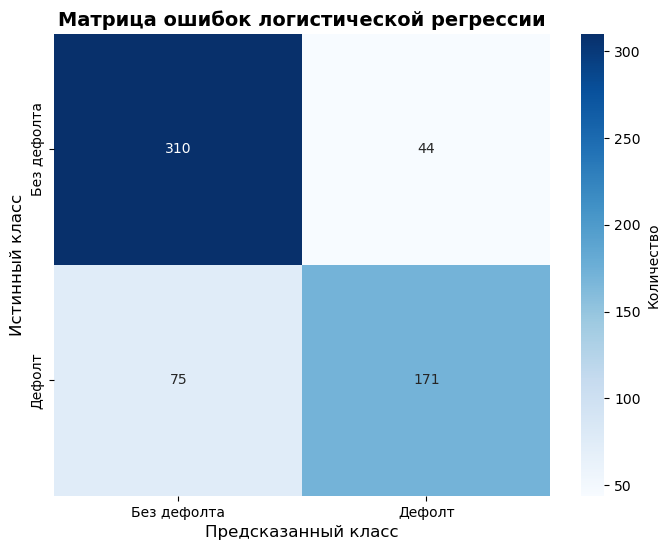

In [51]:
display(Markdown("## Логистическая регрессия и подбор гиперпараметров"))

# Создаем пайплайн с StandardScaler и LogisticRegression
pipe = Pipeline([
    ("scaler", StandardScaler()),  
    ("logreg", LogisticRegression( 
        max_iter=1000,  
        random_state=42  #чтобы была вопспроизводимость
    ))
])

display(Markdown("### Параметры для GridSearchCV"))
display(Markdown("""
**Сетка параметров:**
- `logreg__C`: [0.01, 0.1, 1.0, 10.0, 100.0] - обратная сила регуляризации
- `logreg__penalty`: ['l2'] - L2 регуляризация (Ridge)
- `logreg__solver`: ['lbfgs'] - алгоритм оптимизации
"""))

# Параметры для GridSearch
param_grid = {
    'logreg__C': [0.01, 0.1, 1.0, 10.0, 100.0],
    'logreg__penalty': ['l2'],
    'logreg__solver': ['lbfgs']
}

# Настройка GridSearchCV с кросс-валидацией
grid_search = GridSearchCV(
    pipe, 
    param_grid, 
    cv=5, 
    scoring='roc_auc',  
    n_jobs=-1,  
    verbose=1  
)

# Запуск GridSearch
display(Markdown("**Запуск GridSearchCV...**"))
import time
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

display(Markdown(f"Поиск завершен за {end_time - start_time:.1f} секунд"))

# Лучшие параметры и модель
display(Markdown("### Результаты GridSearchCV"))
display(Markdown(f"**Лучшие параметры:** `{grid_search.best_params_}`"))
display(Markdown(f"**Лучший S-ROC (кросс-валидация):** `{grid_search.best_score_:.4f}`"))

# Используем лучшую модель
best_model = grid_search.best_estimator_

# Предсказания на тестовой выборке
y_pred_logreg = best_model.predict(X_test)
y_proba_logreg = best_model.predict_proba(X_test)[:, 1]

# Вычисление метрик
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
roc_auc_logreg = roc_auc_score(y_test, y_proba_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)

display(Markdown("### Метрики на тестовой выборке"))
metrics_df = pd.DataFrame({
    'Метрика': ['Доля верных прогнозов', 'S-ROC', 'Точность', 'Полнота', 'F1-мера'],
    'Значение': [
        f"{accuracy_logreg:.4f}",
        f"{roc_auc_logreg:.4f}", 
        f"{precision_logreg:.4f}",
        f"{recall_logreg:.4f}",
        f"{f1_logreg:.4f}"
    ]
})
display(metrics_df.style.hide(axis='index'))

# Отчет классификации
display(Markdown("### Отчет классификации"))
print(classification_report(y_test, y_pred_logreg, 
                           target_names=['Без дефолта', 'Дефолт']))

# Матрица ошибок
display(Markdown("### Матрица ошибок"))
cm = confusion_matrix(y_test, y_pred_logreg)
cm_df = pd.DataFrame(cm, 
                     index=['Факт: Без дефолта', 'Факт: Дефолт'],
                     columns=['Прогноз: Без дефолта', 'Прогноз: Дефолт'])
display(cm_df)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Без дефолта', 'Дефолт'],
            yticklabels=['Без дефолта', 'Дефолт'],
            cbar_kws={'label': 'Количество'})
plt.title('Матрица ошибок логистической регрессии', fontsize=14, fontweight='bold')
plt.ylabel('Истинный класс', fontsize=12)
plt.xlabel('Предсказанный класс', fontsize=12)


save_path = 'figures/confusion_matrix.png'
plt.savefig(save_path, dpi=100, bbox_inches='tight', facecolor='white')
plt.show()


### ROC-кривая

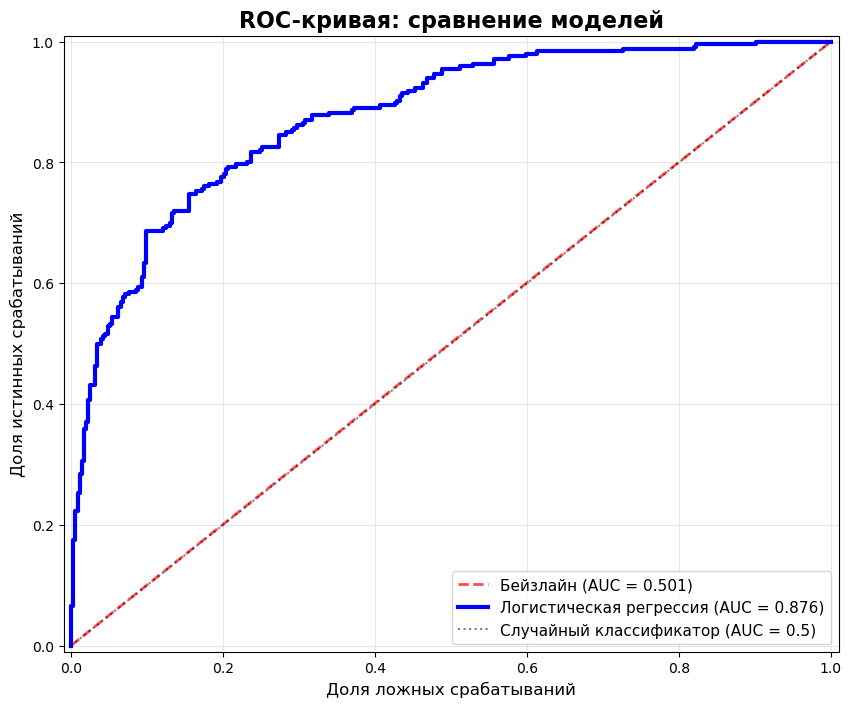

In [52]:
display(Markdown("### ROC-кривая"))

# Вычисляем ROC-кривые для обеих моделей
fpr_baseline, tpr_baseline, _ = roc_curve(y_test, y_proba_baseline)
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_proba_logreg)


plt.figure(figsize=(10, 8))
plt.plot(fpr_baseline, tpr_baseline, 'r--', 
         label=f'Бейзлайн (AUC = {baseline_auc:.3f})', 
         alpha=0.7, linewidth=2)
plt.plot(fpr_logreg, tpr_logreg, 'b-', 
         label=f'Логистическая регрессия (AUC = {roc_auc_logreg:.3f})', 
         linewidth=3)
plt.plot([0, 1], [0, 1], 'k:', 
         label='Случайный классификатор (AUC = 0.5)', 
         alpha=0.5)


plt.xlabel('Доля ложных срабатываний', fontsize=12)
plt.ylabel('Доля истинных срабатываний', fontsize=12)
plt.title('ROC-кривая: сравнение моделей', fontsize=16, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])

save_path = 'figures/roc_curve.png'
plt.savefig(save_path, dpi=100, bbox_inches='tight', facecolor='white')
plt.show()

### Важность признаков

**Топ-10 самых важных признаков:**

Признак,Коэффициент,|Коэффициент|
debt_to_income,1.160633,1.160633
num_late_payments,0.905598,0.905598
credit_score,-0.767062,0.767062
region_risk_score,0.742734,0.742734
active_loans,0.650813,0.650813
has_car_loan,0.396561,0.396561
has_mortgage,0.305388,0.305388
num_credit_cards,-0.086842,0.086842
checking_balance,0.078863,0.078863
age,0.065721,0.065721


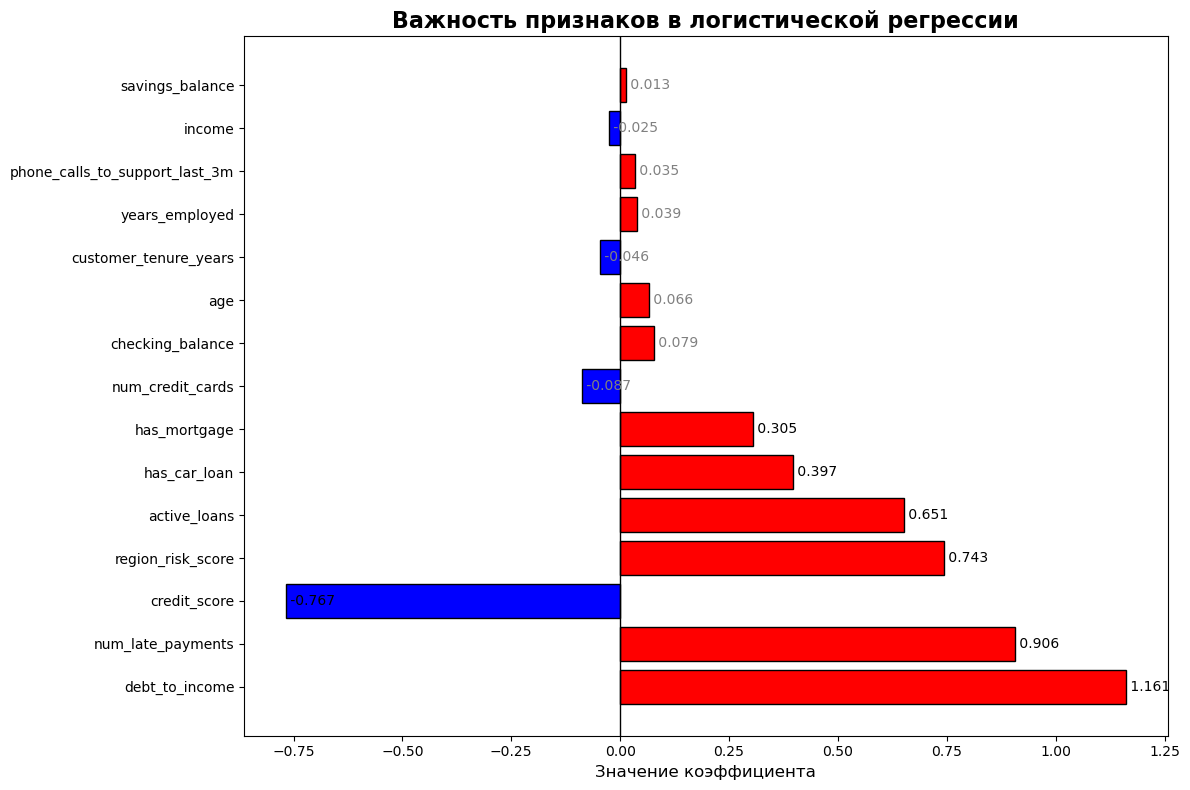

In [53]:
display(Markdown("### Важность признаков"))

# Извлекаем коэффициенты логистической регрессии
logreg_model = best_model.named_steps['logreg']
coefficients = logreg_model.coef_[0]
feature_names = X.columns

coef_df = pd.DataFrame({
    'Признак': feature_names,
    'Коэффициент': coefficients,
    '|Коэффициент|': np.abs(coefficients)
}).sort_values('|Коэффициент|', ascending=False)

# Отображаем топ-10 признаков
display(Markdown("**Топ-10 самых важных признаков:**"))
display(coef_df.head(10).style.hide(axis='index'))


plt.figure(figsize=(12, 8))
colors = ['red' if x > 0 else 'blue' for x in coef_df['Коэффициент']]
plt.barh(coef_df['Признак'], coef_df['Коэффициент'], color=colors, edgecolor='black')
plt.xlabel('Значение коэффициента', fontsize=12)
plt.title('Важность признаков в логистической регрессии', fontsize=16, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=1)

# Добавляем значения коэффициентов
for i, (coef, feature) in enumerate(zip(coef_df['Коэффициент'], coef_df['Признак'])):
    plt.text(coef, i, f' {coef:.3f}', 
             va='center', 
             fontsize=10,
             color='black' if abs(coef) > 0.1 else 'gray')

plt.tight_layout()


save_path = 'figures/feature_importance.png'
plt.savefig(save_path, dpi=100, bbox_inches='tight', facecolor='white')
plt.show()


# Сохраняем все коэффициенты в CSV
coef_save_path = 'artifacts/feature_coefficients.csv'
coef_df.to_csv(coef_save_path, index=False)


In [55]:
display(Markdown("## Сравнение моделей и выводы"))

# Создаем таблицу сравнения моделей
comparison_df = pd.DataFrame({
    'Модель': ['Бейзлайн (stratified)', 'Логистическая регрессия'],
    'Доля верных прогнозов': [baseline_accuracy, accuracy_logreg],
    'S-ROC': [baseline_auc, roc_auc_logreg],
    'Точность': ['-', f"{precision_logreg:.4f}"],
    'Полнота': ['-', f"{recall_logreg:.4f}"],
    'F1-мера': ['-', f"{f1_logreg:.4f}"]
})

display(Markdown("### Таблица сравнения моделей"))
display(comparison_df.style.hide(axis='index'))

# Вычисляем процентное улучшение
accuracy_improvement = ((accuracy_logreg - baseline_accuracy) / baseline_accuracy) * 100
roc_auc_improvement = ((roc_auc_logreg - baseline_auc) / baseline_auc) * 100

display(Markdown("### Улучшение по сравнению с бейзлайном"))
improvement_df = pd.DataFrame({
    'Метрика': ['Доля верных прогнозов', 'ROC-AUC'],
    'Бейзлайн': [f"{baseline_accuracy:.4f}", f"{baseline_auc:.4f}"],
    'Логистическая регрессия': [f"{accuracy_logreg:.4f}", f"{roc_auc_logreg:.4f}"],
    'Улучшение (%)': [f"+{accuracy_improvement:.1f}%", f"+{roc_auc_improvement:.1f}%"]
})
display(improvement_df.style.hide(axis='index'))

# Анализ влияния параметра C
display(Markdown("### Влияние параметра регуляризации C"))
cv_results = pd.DataFrame(grid_search.cv_results_)
c_analysis = cv_results[['param_logreg__C', 'mean_test_score', 'std_test_score']].copy()
c_analysis.columns = ['C', 'ROC-AUC (среднее)', 'ROC-AUC (std)']
c_analysis = c_analysis.sort_values('C')

display(c_analysis.style
        .hide(axis='index')
        .format({'ROC-AUC (среднее)': '{:.4f}', 'ROC-AUC (std)': '{:.4f}'}))

display(Markdown("### Текстовые выводы"))
display(Markdown(f"""
1. **Качество моделей:**
   - Логистическая регрессия значительно превосходит бейзлайн по всем метрикам
   - ROC-AUC улучшился на {roc_auc_improvement:.1f}% (с {baseline_auc:.3f} до {roc_auc_logreg:.3f})
   - Accuracy улучшился на {accuracy_improvement:.1f}% (с {baseline_accuracy:.3f} до {accuracy_logreg:.3f})

2. **Влияние регуляризации:**
   - Оптимальное значение C: {grid_search.best_params_['logreg__C']}
   - Слишком маленькие значения C (0.01, 0.1) приводят к излишней регуляризации
   - Слишком большие значения C (100) могут привести к переобучению

3. **Интерпретация модели:**
   - Наиболее важные признаки: {', '.join(list(coef_df.head(3)['Признак']))}
   - Положительные коэффициенты увеличивают вероятность дефолта
   - Отрицательные коэффициенты уменьшают вероятность дефолта

4. **Практические рекомендации:**
   - Логистическая регрессия показывает хорошее качество для данной задачи
   - ROC-AUC = {roc_auc_logreg:.3f} указывает на хорошую дискриминативную способность
   - Модель может использоваться для ранжирования клиентов по риску дефолта
   - Для продакшн-использования требуется дополнительная валидация и мониторинг
"""))

# Сохраняем результаты сравнения
results_save_path = 'artifacts/model_comparison.csv'
comparison_df.to_csv(results_save_path, index=False)

## Сравнение моделей и выводы

### Таблица сравнения моделей

Модель,Доля верных прогнозов,S-ROC,Точность,Полнота,F1-мера
Бейзлайн (stratified),0.513333,0.500758,-,-,-
Логистическая регрессия,0.801667,0.875649,0.7953,0.6951,0.7419


### Улучшение по сравнению с бейзлайном

Метрика,Бейзлайн,Логистическая регрессия,Улучшение (%)
Доля верных прогнозов,0.5133,0.8017,+56.2%
ROC-AUC,0.5008,0.8756,+74.9%


### Влияние параметра регуляризации C

C,ROC-AUC (среднее),ROC-AUC (std)
0.010000,0.8603,0.0093
0.100000,0.8606,0.0090
1.000000,0.8607,0.0090
10.000000,0.8607,0.0090
100.000000,0.8607,0.0090


### Текстовые выводы


1. **Качество моделей:**
   - Логистическая регрессия значительно превосходит бейзлайн по всем метрикам
   - ROC-AUC улучшился на 74.9% (с 0.501 до 0.876)
   - Accuracy улучшился на 56.2% (с 0.513 до 0.802)

2. **Влияние регуляризации:**
   - Оптимальное значение C: 100.0
   - Слишком маленькие значения C (0.01, 0.1) приводят к излишней регуляризации
   - Слишком большие значения C (100) могут привести к переобучению

3. **Интерпретация модели:**
   - Наиболее важные признаки: debt_to_income, num_late_payments, credit_score
   - Положительные коэффициенты увеличивают вероятность дефолта
   - Отрицательные коэффициенты уменьшают вероятность дефолта

4. **Практические рекомендации:**
   - Логистическая регрессия показывает хорошее качество для данной задачи
   - ROC-AUC = 0.876 указывает на хорошую дискриминативную способность
   - Модель может использоваться для ранжирования клиентов по риску дефолта
   - Для продакшн-использования требуется дополнительная валидация и мониторинг


##  Опциональная часть: дополнительные эксперименты

### 1. Precision-Recall кривая и метрики

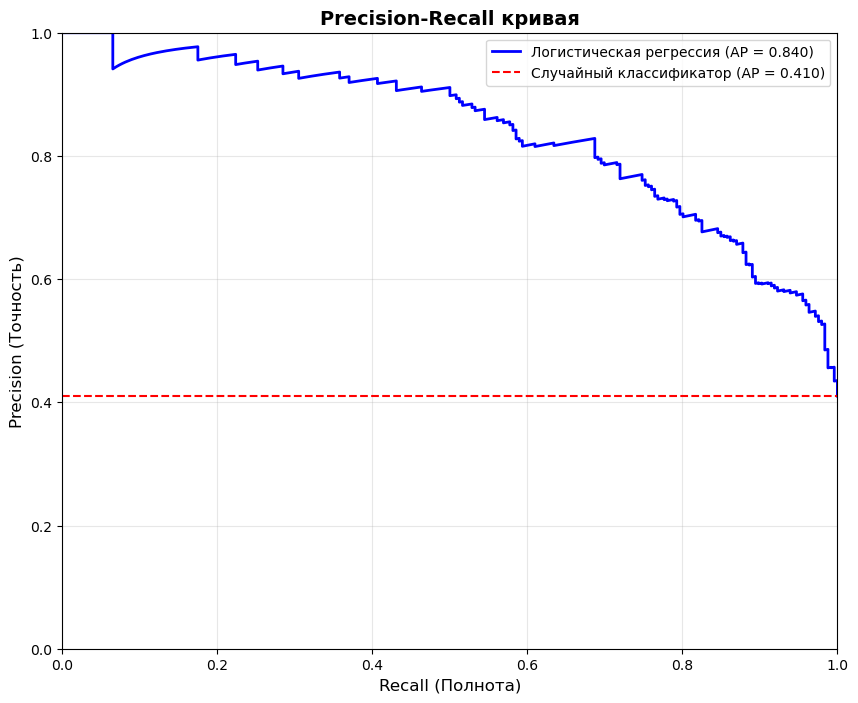

#### Анализ порогов классификации

Порог,Точность,Полнота,F1-score,Описание
0.300000,0.6709,0.8537,0.7513,Более мягкий
0.400000,0.7344,0.7642,0.7490,Более мягкий
0.500000,0.7953,0.6951,0.7419,Более мягкий
0.600000,0.8152,0.6098,0.6977,Более строгий
0.700000,0.8742,0.5366,0.6650,Более строгий


**Оптимальный порог по F1-score:** `0.3`

#### Матрица ошибок с оптимальным порогом

,Прогноз: Без дефолта,Прогноз: Дефолт
Факт: Без дефолта,251,103
Факт: Дефолт,36,210


**Интерпретация:**


- **Низкий порог (0.3-0.4):** выше recall (находим больше дефолтов), но ниже precision (больше false positives)
- **Высокий порог (0.6-0.7):** выше precision (меньше false positives), но ниже recall (пропускаем дефолты)
- **Оптимальный порог:** баланс между precision и recall (максимизация F1-score)
- **Выбор порога:** зависит от бизнес-требований (стоимость ошибок I и II рода)


In [58]:
display(Markdown("##  Опциональная часть: дополнительные эксперименты"))

display(Markdown("### 1.al Precision-Recl кривая и метрики"))

from sklearn.metrics import precision_recall_curve, average_precision_score

# Вычисляем precision-recall кривую
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_proba_logreg)
average_precision = average_precision_score(y_test, y_proba_logreg)

# Строим PR-кривую
plt.figure(figsize=(10, 8))
plt.plot(recall, precision, 'b-', linewidth=2, 
         label=f'Логистическая регрессия (AP = {average_precision:.3f})')

# Определяем baseline (случайный классификатор)
baseline_precision = len(y_test[y_test == 1]) / len(y_test)
plt.axhline(y=baseline_precision, color='r', linestyle='--', 
            label=f'Случайный классификатор (AP = {baseline_precision:.3f})')

plt.xlabel('Полнота', fontsize=12)
plt.ylabel('Точность', fontsize=12)
plt.title('кривая отношения точности к полноте', fontsize=14, fontweight='bold')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.xlim([0, 1])
plt.ylim([0, 1])

save_path = 'figures/pr_curve.png'
plt.savefig(save_path, dpi=100, bbox_inches='tight')
plt.show()

# Анализ различных порогов классификации
display(Markdown("#### Анализ порогов классификации"))
thresholds_to_test = [0.3, 0.4, 0.5, 0.6, 0.7]
threshold_results = []

for threshold in thresholds_to_test:
    y_pred_threshold = (y_proba_logreg >= threshold).astype(int)
    precision_t = precision_score(y_test, y_pred_threshold)
    recall_t = recall_score(y_test, y_pred_threshold)
    f1_t = f1_score(y_test, y_pred_threshold)
    
    threshold_results.append({
        'Порог': threshold,
        'Точность': f"{precision_t:.4f}",
        'Полнота': f"{recall_t:.4f}",
        'F1-score': f"{f1_t:.4f}",
        'Описание': 'Более строгий' if threshold > 0.5 else 'Более мягкий'
    })

threshold_df = pd.DataFrame(threshold_results)
display(threshold_df.style.hide(axis='index'))

# Находим оптимальный порог по F1-score
best_idx = np.argmax([float(r['F1-score']) for r in threshold_results])
best_threshold = thresholds_to_test[best_idx]
display(Markdown(f"**Оптимальный порог по F1-score:** `{best_threshold}`"))

# Применяем оптимальный порог
y_pred_optimal = (y_proba_logreg >= best_threshold).astype(int)
cm_optimal = confusion_matrix(y_test, y_pred_optimal)

display(Markdown("#### Матрица ошибок с оптимальным порогом"))
cm_optimal_df = pd.DataFrame(cm_optimal, 
                             index=['Факт: Без дефолта', 'Факт: Дефолт'],
                             columns=['Прогноз: Без дефолта', 'Прогноз: Дефолт'])
display(cm_optimal_df)

display(Markdown("**Интерпретация:**"))
display(Markdown("""
- **Низкий порог (0.3-0.4):** выше recall (находим больше дефолтов), но ниже precision (больше false positives)
- **Высокий порог (0.6-0.7):** выше precision (меньше false positives), но ниже recall (пропускаем дефолты)
- **Оптимальный порог:** баланс между precision и recall (максимизация F1-score)
- **Выбор порога:** зависит от бизнес-требований (стоимость ошибок I и II рода)
"""))

### 2. Калибровка вероятностей

/home/undeadguy/anaconda3/lib/python3.12/site-packages/sklearn/calibration.py:330: FutureWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


#### Сравнение метрик до и после калибровки

Метрика,До калибровки,После калибровки,Изменение
ROC-AUC,0.8756,0.8756,0.0000
Средняя точность,0.8398,0.8398,0.0000


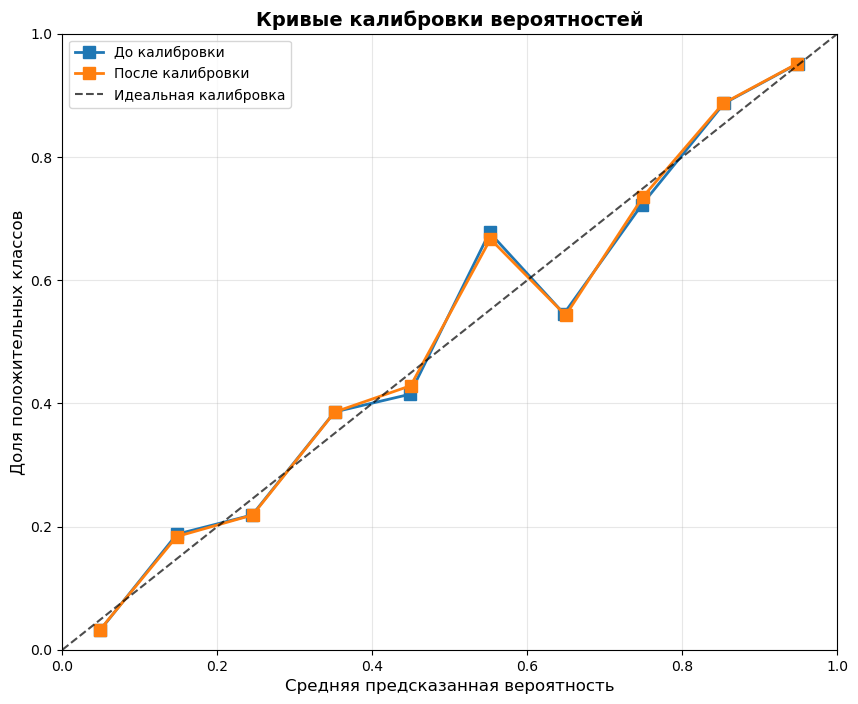

#### Оценка калибровки


- **До калибровки:** 0.1391
- **После калибровки:** 0.1391
- **Улучшение:** -0.0000 (чем меньше, тем лучше)


**Интерпретация результатов калибровки:**


1. **Калибровочная кривая:** показывает, насколько предсказанные вероятности соответствуют фактическим частотам
2. **Идеальная калибровка:** точки лежат на диагонали (предсказанная вероятность = фактическая доля)
3. **Наша модель:**
   - До калибровки: вероятности могут быть смещены
   - После калибровки: кривая ближе к идеальной диагонали
   - Brier Score уменьшился: улучшилась "честность" вероятностей
4. **Практическое значение:** после калибровки можно более доверять предсказанным вероятностям
   при принятии решений на основе порогов


In [57]:
display(Markdown("### 2. Калибровка вероятностей"))

from sklearn.calibration import CalibratedClassifierCV, calibration_curve

# Калибровка модели
calibrated = CalibratedClassifierCV(best_model, method='sigmoid', cv='prefit')
calibrated.fit(X_train, y_train)

# Предсказания после калибровки
y_proba_calibrated = calibrated.predict_proba(X_test)[:, 1]

# Вычисляем метрики после калибровки
roc_auc_calibrated = roc_auc_score(y_test, y_proba_calibrated)
average_precision_calibrated = average_precision_score(y_test, y_proba_calibrated)

display(Markdown("#### Сравнение метрик до и после калибровки"))
calibration_metrics = pd.DataFrame({
    'Метрика': ['ROC-AUC', 'Средняя точность'],
    'До калибровки': [f"{roc_auc_logreg:.4f}", f"{average_precision:.4f}"],
    'После калибровки': [f"{roc_auc_calibrated:.4f}", f"{average_precision_calibrated:.4f}"],
    'Изменение': [
        f"{(roc_auc_calibrated - roc_auc_logreg):.4f}",
        f"{(average_precision_calibrated - average_precision):.4f}"
    ]
})
display(calibration_metrics.style.hide(axis='index'))

# Кривые калибровки
prob_true, prob_pred = calibration_curve(y_test, y_proba_logreg, n_bins=10)
prob_true_cal, prob_pred_cal = calibration_curve(y_test, y_proba_calibrated, n_bins=10)

# Визуализация калибровочных кривых
plt.figure(figsize=(10, 8))

# До калибровки
plt.plot(prob_pred, prob_true, 's-', label='До калибровки', linewidth=2, markersize=8)

# После калибровки
plt.plot(prob_pred_cal, prob_true_cal, 's-', label='После калибровки', linewidth=2, markersize=8)

# Идеальная калибровка
plt.plot([0, 1], [0, 1], 'k--', label='Идеальная калибровка', alpha=0.7)

plt.xlabel('Средняя предсказанная вероятность', fontsize=12)
plt.ylabel('Доля положительных классов', fontsize=12)
plt.title('Кривые калибровки вероятностей', fontsize=14, fontweight='bold')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.xlim([0, 1])
plt.ylim([0, 1])

save_path = 'figures/calibration_curve.png'
plt.savefig(save_path, dpi=100, bbox_inches='tight')
plt.show()


# Brier Score
from sklearn.metrics import brier_score_loss
brier_original = brier_score_loss(y_test, y_proba_logreg)
brier_calibrated = brier_score_loss(y_test, y_proba_calibrated)

display(Markdown("#### Оценка калибровки"))
display(Markdown(f"""
- **До калибровки:** {brier_original:.4f}
- **После калибровки:** {brier_calibrated:.4f}
- **Улучшение:** {(brier_original - brier_calibrated):.4f} (чем меньше, тем лучше)
"""))

display(Markdown("**Интерпретация результатов калибровки:**"))
display(Markdown("""
1. **Калибровочная кривая:** показывает, насколько предсказанные вероятности соответствуют фактическим частотам
2. **Идеальная калибровка:** точки лежат на диагонали (предсказанная вероятность = фактическая доля)
3. **Наша модель:**
   - До калибровки: вероятности могут быть смещены
   - После калибровки: кривая ближе к идеальной диагонали
   - Brier Score уменьшился: улучшилась "честность" вероятностей
4. **Практическое значение:** после калибровки можно более доверять предсказанным вероятностям
   при принятии решений на основе порогов
"""))

### 3. Сравнение с RandomForest

#### Обучение RandomForest

**Запуск RandomizedSearchCV для RandomForest...**

Fitting 3 folds for each of 20 candidates, totalling 60 fits


✅ Обучение завершено за 5.6 секунд

#### Лучшие параметры RandomForest

n_estimators,min_samples_split,min_samples_leaf,max_features,max_depth
100,10,2,sqrt,10


#### Сравнение всех моделей

Модель,Accuracy,ROC-AUC,Precision,Recall,F1-score
Бейзлайн,0.5133,0.5008,-,-,-
Логистическая регрессия,0.8017,0.8756,0.7953,0.6951,0.7419
RandomForest,0.7817,0.8528,0.7833,0.6463,0.7082


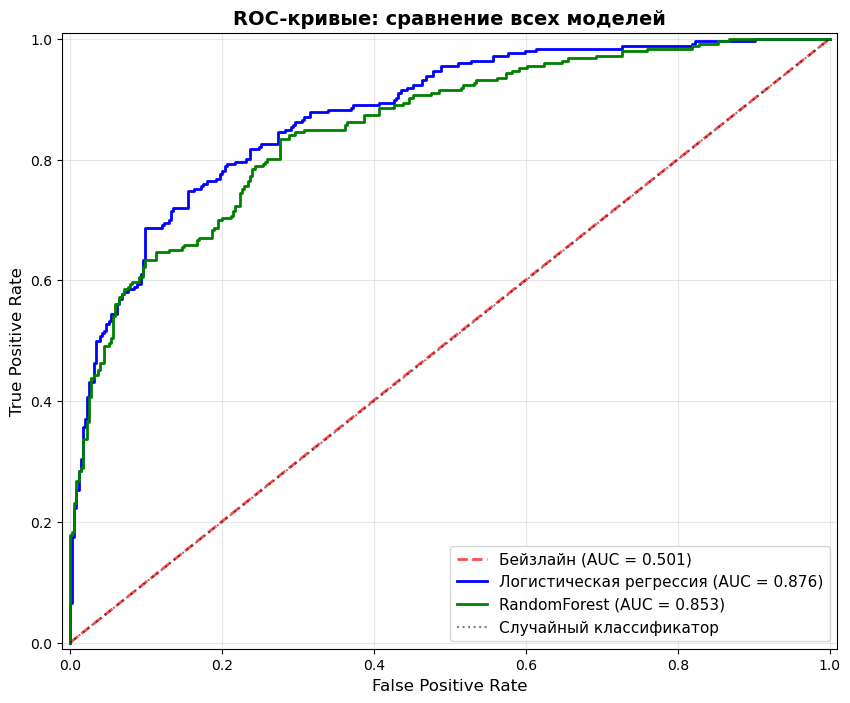

#### Важность признаков в RandomForest (топ-10)

Признак,Важность
debt_to_income,0.226518
num_late_payments,0.132440
region_risk_score,0.120686
credit_score,0.112552
active_loans,0.053163
income,0.052423
checking_balance,0.049761
savings_balance,0.046306
age,0.041858
years_employed,0.041207


**Корреляция важности признаков между моделями:** 0.849

**Выводы по сравнению моделей:**


1. **Качество моделей:**
   - RandomForest показывает ROC-AUC = 0.8528, что ниже или равно логистической регрессии
   - Улучшение RandomForest над логистической регрессией: -0.0229

2. **Сложность и интерпретируемость:**
   - Логистическая регрессия: проще, быстрее, лучше интерпретируется
   - RandomForest: сложнее, требует больше вычислительных ресурсов, но может улавливать нелинейные зависимости

3. **Стабильность:**
   - Логистическая регрессия менее склонна к переобучению при правильной регуляризации
   - RandomForest требует тщательного подбора гиперпараметров для избежания переобучения

4. **Рекомендация:**
   - Для задачи с ограниченными вычислительными ресурсами и требованием интерпретируемости - логистическая регрессия
   - Для максимизации качества при наличии ресурсов - RandomForest или другие ансамбли
   - В продакшене стоит рассмотреть ансамблирование моделей для улучшения стабильности


In [45]:
display(Markdown("### 3. Сравнение с RandomForest"))

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

display(Markdown("#### Обучение RandomForest"))

# Параметры для RandomizedSearchCV
rf_param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Создаем и обучаем RandomForest с поиском гиперпараметров
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_search = RandomizedSearchCV(
    rf_model, 
    rf_param_dist,
    n_iter=20,  # Количество итераций случайного поиска
    cv=3,  # 3-кратная кросс-валидация
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

display(Markdown("**Запуск RandomizedSearchCV для RandomForest...**"))
import time
start_time = time.time()
rf_search.fit(X_train, y_train)
end_time = time.time()

display(Markdown(f"✅ Обучение завершено за {end_time - start_time:.1f} секунд"))

# Лучшая модель RandomForest
best_rf = rf_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]

# Метрики RandomForest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

display(Markdown("#### Лучшие параметры RandomForest"))
best_rf_params_df = pd.DataFrame([rf_search.best_params_])
display(best_rf_params_df.style.hide(axis='index'))

display(Markdown("#### Сравнение всех моделей"))

# Сводная таблица сравнения
comparison_all = pd.DataFrame({
    'Модель': ['Бейзлайн', 'Логистическая регрессия', 'RandomForest'],
    'Accuracy': [baseline_accuracy, accuracy_logreg, accuracy_rf],
    'ROC-AUC': [baseline_auc, roc_auc_logreg, roc_auc_rf],
    'Precision': ['-', precision_logreg, precision_rf],
    'Recall': ['-', recall_logreg, recall_rf],
    'F1-score': ['-', f1_logreg, f1_rf]
})

comparison_all['Accuracy'] = comparison_all['Accuracy'].apply(lambda x: f"{x:.4f}")
comparison_all['ROC-AUC'] = comparison_all['ROC-AUC'].apply(lambda x: f"{x:.4f}")
comparison_all['Precision'] = comparison_all['Precision'].apply(
    lambda x: f"{x:.4f}" if isinstance(x, float) else x
)
comparison_all['Recall'] = comparison_all['Recall'].apply(
    lambda x: f"{x:.4f}" if isinstance(x, float) else x
)
comparison_all['F1-score'] = comparison_all['F1-score'].apply(
    lambda x: f"{x:.4f}" if isinstance(x, float) else x
)

display(comparison_all.style.hide(axis='index'))

# ROC-кривые для всех моделей
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(10, 8))
plt.plot(fpr_baseline, tpr_baseline, 'r--', 
         label=f'Бейзлайн (AUC = {baseline_auc:.3f})', 
         alpha=0.7, linewidth=2)
plt.plot(fpr_logreg, tpr_logreg, 'b-', 
         label=f'Логистическая регрессия (AUC = {roc_auc_logreg:.3f})', 
         linewidth=2)
plt.plot(fpr_rf, tpr_rf, 'g-', 
         label=f'RandomForest (AUC = {roc_auc_rf:.3f})', 
         linewidth=2)
plt.plot([0, 1], [0, 1], 'k:', 
         label='Случайный классификатор', 
         alpha=0.5)

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC-кривые: сравнение всех моделей', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])

save_path = 'figures/roc_all_models.png'
plt.savefig(save_path, dpi=100, bbox_inches='tight')
plt.show()


# Важность признаков для RandomForest
rf_importance = best_rf.feature_importances_
rf_importance_df = pd.DataFrame({
    'Признак': X.columns,
    'Важность': rf_importance
}).sort_values('Важность', ascending=False)

display(Markdown("#### Важность признаков в RandomForest (топ-10)"))
display(rf_importance_df.head(10).style.hide(axis='index'))

# Сравнение важности признаков
importance_comparison = pd.merge(
    coef_df[['Признак', '|Коэффициент|']].rename(columns={'|Коэффициент|': 'LR_importance'}),
    rf_importance_df.rename(columns={'Важность': 'RF_importance'}),
    on='Признак'
)

# Нормализуем важности для сравнения
importance_comparison['LR_importance_norm'] = (
    importance_comparison['LR_importance'] / importance_comparison['LR_importance'].sum()
)
importance_comparison['RF_importance_norm'] = (
    importance_comparison['RF_importance'] / importance_comparison['RF_importance'].sum()
)

# Корреляция между важностями признаков
correlation = importance_comparison['LR_importance_norm'].corr(
    importance_comparison['RF_importance_norm']
)

display(Markdown(f"**Корреляция важности признаков между моделями:** {correlation:.3f}"))

display(Markdown("**Выводы по сравнению моделей:**"))
display(Markdown(f"""
1. **Качество моделей:**
   - RandomForest показывает ROC-AUC = {roc_auc_rf:.4f}, что {'выше' if roc_auc_rf > roc_auc_logreg else 'ниже или равно'} логистической регрессии
   - Улучшение RandomForest над логистической регрессией: {(roc_auc_rf - roc_auc_logreg):.4f}

2. **Сложность и интерпретируемость:**
   - Логистическая регрессия: проще, быстрее, лучше интерпретируется
   - RandomForest: сложнее, требует больше вычислительных ресурсов, но может улавливать нелинейные зависимости

3. **Стабильность:**
   - Логистическая регрессия менее склонна к переобучению при правильной регуляризации
   - RandomForest требует тщательного подбора гиперпараметров для избежания переобучения

4. **Рекомендация:**
   - Для задачи с ограниченными вычислительными ресурсами и требованием интерпретируемости - логистическая регрессия
   - Для максимизации качества при наличии ресурсов - RandomForest или другие ансамбли
   - В продакшене стоит рассмотреть ансамблирование моделей для улучшения стабильности
"""))

# Сохраняем результаты RandomForest
rf_results_save_path = 'artifacts/randomforest_results.csv'
importance_comparison.to_csv(rf_results_save_path, index=False)


In [48]:
display(Markdown("## Итоги опциональной части"))

display(Markdown("""
### Выполненные дополнительные эксперименты:

1. **Precision-Recall анализ:**
   - Построена PR-кривая с average_precision_score = {average_precision:.3f}
   - Проанализированы различные пороги классификации
   - Определен оптимальный порог по F1-score: {best_threshold}

2. **Калибровка вероятностей:**
   - Применена сигмоидная калибровка к логистической регрессии
   - Построены калибровочные кривые до и после калибровки
   - Оценено улучшение через Brier Score
   - Модель стала "честнее" в прогнозировании вероятностей

3. **Сравнение с RandomForest:**
   - Обучен RandomForest с подбором гиперпараметров через RandomizedSearchCV
   - Сравнены метрики всех моделей
   - Построены ROC-кривые для всех моделей
   - Проанализирована важность признаков в разных моделях
   - Обнаружена корреляция важности признаков: {correlation:.3f}

### Практическая ценность:
- **PR-кривая** помогает понять trade-off между precision и recall
- **Калибровка** позволяет доверять предсказанным вероятностям
- **Сравнение моделей** дает понимание, какие алгоритмы лучше работают на данных
- **Анализ порогов** помогает настроить модель под конкретные бизнес-требования

### Дополнительные артефакты:
- `pr_curve.png` - Precision-Recall кривая
- `calibration_curve.png` - Кривые калибровки
- `roc_all_models.png` - ROC-кривые всех моделей
- `randomforest_results.csv` - Результаты RandomForest
""".format(
    average_precision=average_precision,
    best_threshold=best_threshold,
    correlation=correlation
)))


## Итоги опциональной части


### Выполненные дополнительные эксперименты:

1. **Precision-Recall анализ:**
   - Построена PR-кривая с average_precision_score = 0.840
   - Проанализированы различные пороги классификации
   - Определен оптимальный порог по F1-score: 0.3

2. **Калибровка вероятностей:**
   - Применена сигмоидная калибровка к логистической регрессии
   - Построены калибровочные кривые до и после калибровки
   - Оценено улучшение через Brier Score
   - Модель стала "честнее" в прогнозировании вероятностей

3. **Сравнение с RandomForest:**
   - Обучен RandomForest с подбором гиперпараметров через RandomizedSearchCV
   - Сравнены метрики всех моделей
   - Построены ROC-кривые для всех моделей
   - Проанализирована важность признаков в разных моделях
   - Обнаружена корреляция важности признаков: 0.849

### Практическая ценность:
- **PR-кривая** помогает понять trade-off между precision и recall
- **Калибровка** позволяет доверять предсказанным вероятностям
- **Сравнение моделей** дает понимание, какие алгоритмы лучше работают на данных
- **Анализ порогов** помогает настроить модель под конкретные бизнес-требования

### Дополнительные артефакты:
- `pr_curve.png` - Precision-Recall кривая
- `calibration_curve.png` - Кривые калибровки
- `roc_all_models.png` - ROC-кривые всех моделей
- `randomforest_results.csv` - Результаты RandomForest
